In [3]:
pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 784.8/784.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 17.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.9/110.9 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.6/774.6 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.0/275.0 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.2/169.2

In [4]:
import pandas as pd
import numpy as np
from darts import TimeSeries
from darts.datasets import WeatherDataset
from darts.models import NHiTSModel
from sklearn.preprocessing import StandardScaler

In [5]:
import pandas as pd
from darts import TimeSeries

# Read your DataFrame with the correct date format
df = pd.read_csv('Final_whole_data.csv', parse_dates=['Date'], dayfirst=True)

# Sort the DataFrame by date if not already sorted
df = df.sort_values('Date')

# Ensure a complete date range for your chosen frequency (e.g., weekly 'W')
start_date = df['Date'].min()
end_date = df['Date'].max()
date_range = pd.date_range(start=start_date, end=end_date, freq='W')

# Reindex the DataFrame to fill in missing dates with NaN values
df = df.set_index('Date').reindex(date_range)
df=df.reset_index()

k = 10
target = df[["index","Pilgrims"]]
val = 11
features = df.iloc[:,:val + 1]
train_features = features.iloc[0:520-k,:]
train_target = target.iloc[0:520-k]

# Convert the DataFrame to a TimeSeries with the explicit frequency
feature_series = TimeSeries.from_dataframe(train_features, 'index', ['tirupati rooms', 'tirupati temple history', 'venkateswara yt',
       'tirupati darshan timings', 'tirumala', 'train to tirupati', 'tirupati',
       'tirupati train', 'kanipakam', 'tirupati distance', 'kalahasti'], freq='W')

target_series = TimeSeries.from_dataframe(train_target, 'index', 'Pilgrims', freq='W')


In [6]:
model = NHiTSModel(
    input_chunk_length=1,
    output_chunk_length=k,
    num_blocks=10,
    n_epochs=20,
)

In [7]:
model.fit(target_series, past_covariates=feature_series)
pred = model.predict(k)
pred.values()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 9.2 M 
---------------------------------------------------
9.2 M     Trainable params
6.2 K     Non-trainable params
9.2 M     Total params
36.914    Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

array([[538387.16496481],
       [549857.77382789],
       [538496.27861979],
       [552298.17659269],
       [500309.75894941],
       [509478.02039167],
       [494835.28650847],
       [487147.98395843],
       [474340.6787356 ],
       [497429.17921505]])

In [8]:
test_features = np.array(features.iloc[520-k:520,:])
test_target = np.array(target["Pilgrims"].iloc[520-k:520])
prediction = pred.values()

In [9]:
test_target

array([500190, 515473, 514404, 492709, 493724, 514367, 478997, 474883,
       490777, 519928])

In [10]:
test_target - np.array(prediction.flatten())

array([-38197.16496481, -34384.77382789, -24092.27861979, -59589.17659269,
        -6585.75894941,   4888.97960833, -15838.28650847, -12264.98395843,
        16436.3212644 ,  22498.82078495])

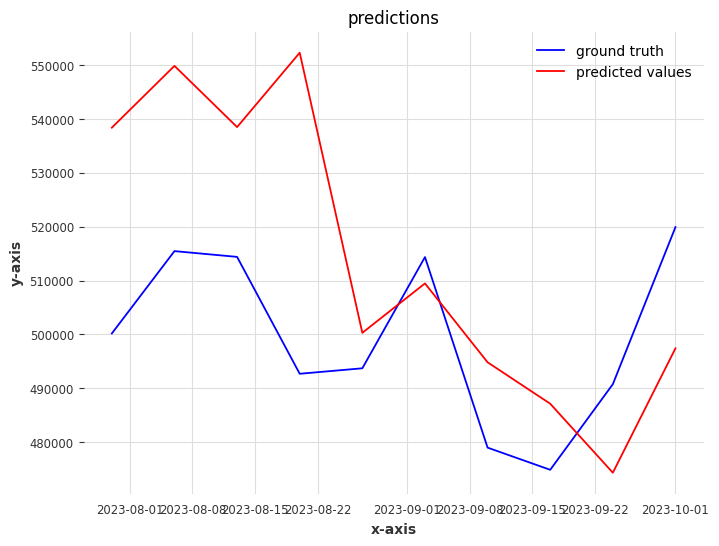

In [26]:
import matplotlib.pyplot as plt
x = np.array(df['index'][520-k:520])  # x-values
y1 =test_target  # First array
y2 = np.array(prediction.flatten())  # Second array

# Plot the two arrays on the same plot
plt.figure(figsize=(8, 6))  # Set the figure size (optional)

# Plot the first array (in blue) with a label
plt.plot(x, y1, label='ground truth', color='blue')

# Plot the second array (in red) with a label
plt.plot(x, y2, label='predicted values', color='red')

# Add labels to the axes
plt.xlabel('x-axis')
plt.ylabel('y-axis')

# Add a legend to differentiate between the two arrays
plt.legend()

# Set a title for the plot
plt.title('predictions')

# Show the plot
plt.grid(True)  # Add a grid (optional)
plt.show()

In [12]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y1,y2)

0.046934791109059584

kalman

In [19]:
import pandas as pd
from darts import TimeSeries

# Assuming you have a DataFrame df containing your dataset
# Make sure to import or create your DataFrame correctly
p = 10
df1 = pd.read_csv('Final_whole_data.csv', parse_dates=['Date'], dayfirst=True)
df1 = df1.sort_values('Date')
start_date = df1['Date'].min()
end_date = df1['Date'].max()
date_range = pd.date_range(start=start_date, end=end_date, freq='W')
df1 = df1.set_index('Date').reindex(date_range)
df1=df1.reset_index()
df1['Date'] = pd.to_datetime(df1['index'],dayfirst = True)
df1.set_index('index', inplace=True)

# Select the columns you want to use as features (excluding 'Pilgrims')
features_df = df1.drop(columns=['Pilgrims','Date'])
extended_features_series = TimeSeries.from_series(features_df)
features_series = TimeSeries.from_series(features_df[0:520-p])

target_series = TimeSeries.from_series(df1['Pilgrims'][0:520-p])


from darts.models import KalmanForecaster

# Initialize the KalmanForecaster model
model = KalmanForecaster(dim_x=12)

# Fit the model with the feature vector and target variable
model.fit(target_series,future_covariates=features_series)

# Make a forecast for the next p steps using the trained model and future covariates
forecast = model.predict(n=p, future_covariates=extended_features_series)

# Access the forecasted values for 'Pilgrims'
forecasted_pilgrims = forecast.pd_series()
forecasted_pilgrims = np.array(forecasted_pilgrims)
forecasted_pilgrims


array([484688.00508705, 514325.81520966, 533437.03203889, 503673.22308625,
       483701.23885293, 469798.62110467, 431513.63130844, 451697.25452497,
       541280.14416156, 516224.2893171 ])

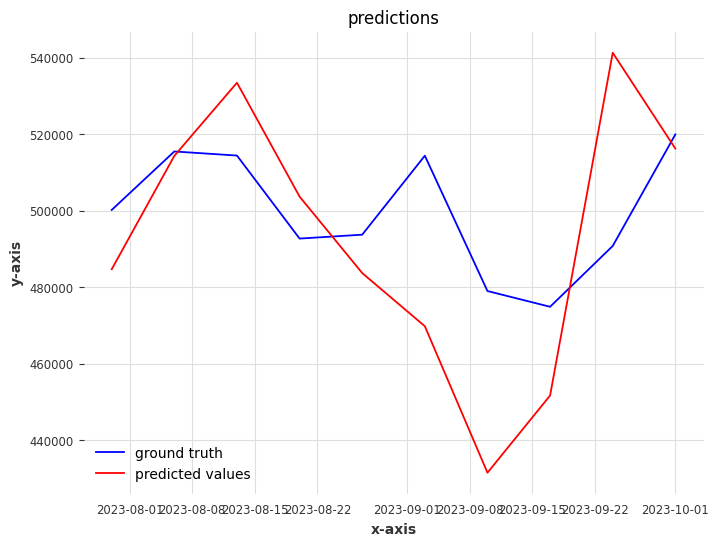

In [20]:
import matplotlib.pyplot as plt
x = np.array(df1['Date'][520-p:520])  # x-values
y1 =df1['Pilgrims'][520-p:520]  # First array
y2 = forecasted_pilgrims  # Second array

# Plot the two arrays on the same plot
plt.figure(figsize=(8, 6))  # Set the figure size (optional)

# Plot the first array (in blue) with a label
plt.plot(x, y1, label='ground truth', color='blue')

# Plot the second array (in red) with a label
plt.plot(x, y2, label='predicted values', color='red')

# Add labels to the axes
plt.xlabel('x-axis')
plt.ylabel('y-axis')

# Add a legend to differentiate between the two arrays
plt.legend()

# Set a title for the plot
plt.title('predictions')

# Show the plot
plt.grid(True)  # Add a grid (optional)
plt.show()

In [21]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y1,y2)

0.045740110744510225